In [17]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd

LX=10          # size of container 
LY=10
KK=100.0       # strength of repulsive wall force
EPS=1          # strength of particle-particle interaction


#x[0]=1
#y[0]=2

#vx[0]=10
#vy[0]=-5

def initialize_random(partNum):
    x = np.zeros(partNum)   # x cooordinate of particles
    y = np.zeros(partNum)  
    vx = np.zeros(partNum)  # velocites 
    vy = np.zeros(partNum)
    ax = np.zeros(partNum)  #accelerations
    ay = np.zeros(partNum)
    for i in range(partNum):
        x[i] = rnd.randrange(LX)
        y[i] = rnd.randrange(LY)
        vx[i] = rnd.randrange(-20,20) #not too high values
        vy[i] = rnd.randrange(-20,20)
    return x,y,vx,vy,ax,ay

def calc_pot_energy(x,y): #to calculate E_pot at initial cond. Assuming (x,y) are inside box.
    V = 0
    for j in range(len(x)):
        for k in range(j+1,len(x)):
            dist = np.sqrt((x[j] - x[k])**2+(y[j] - y[k])**2)
            V += EPS*(dist**(-12)-2*dist**(-6))
    return V

def Verlet(partNum, iterations):
    x,y,vx,vy,ax,ay = initialize_random(partNum)
    X = np.zeros((iterations+1,partNum))
    Y = np.zeros((iterations+1,partNum))
    X[0,:] = x
    Y[0,:] = y
    
    E = np.zeros(iterations+1)
    E[0] = 0.5*np.sum(vx**2+vy**2) + calc_pot_energy(x,y)
    
    for i in range (iterations):

        x[:] = x[:] + vx[:] * dt + (ax[:] * dt**2)/2        #first step of verlet integration
        y[:] = y[:] + vy[:] * dt + (ay[:] * dt**2)/2
        vx[:] = vx[:]+0.5 * ax[:] * dt 
        vy[:] = vy[:]+ 0.5 * ay[:] * dt
        
        
        E[i+1] = 0.5*np.sum(vx**2+vy**2)
        X[i+1,:] = x
        Y[i+1,:] = y
        
        ax[:] = 0
        ay[:] = 0

        for j in range (partNum):

            if (x[j] > LX):
                ax[j]+=-KK*(x[j]-LX)
                E[i+1] += (KK/2)*(x[j]-LX)**2
            elif (x[j] < 0):
                ax[j]+=-KK*x[j]
                E[i+1] += (KK/2)*x[j]**2

            if (y[j] > LY):
                ay[j]+=-KK*(y[j]-LY)
                E[i+1] += (KK/2)*(y[j]-LY)**2
            elif (y[j] < 0):
                ay[j]+=-KK*y[j]
                E[i+1] += (KK/2)*y[j]**2

            for k in range (j+1, partNum):
                dist2 =(x[j] - x[k])**2+(y[j] - y[k])**2
                dist = np.sqrt(dist2)
                dist7=(dist2**3)*dist
                dist13= (dist2**6)*dist
                
                dVdr=12*EPS*(1/dist13-1/dist7)
                aa=(x[j] - x[k])*dVdr
                ax[j] += aa
                ax[k] += -aa
                aa=(y[j] - y[k])*dVdr
                ay[j] += aa
                ay[k] += -aa
                
                E[i+1] += EPS*(dist**(-12)-2*dist**(-6))

        vx[:] = vx[:]+0.5 * ax[:] * dt 
        vy[:] = vy[:]+ 0.5 * ay[:] * dt
        
       
        #plt.scatter(x,y)
    #plt.show()
    return X, Y, E

def plot_box(LX,LY):
    plt.plot(np.linspace(0,LX,50),np.zeros(50),linestyle='dashed',color='k')
    plt.plot(np.linspace(0,LX,50),np.ones(50)*LY,linestyle='dashed',color='k')
    plt.plot(np.zeros(50),np.linspace(0,LY,50),linestyle='dashed',color='k')
    plt.plot(np.ones(50)*LX,np.linspace(0,LY,50),linestyle='dashed',color='k')


### Task 1 One Particle
a) Approximate the largest $\Delta t$ that gives a good numerical solution 

b) Plot Energy as a function of time for different $\Delta t$

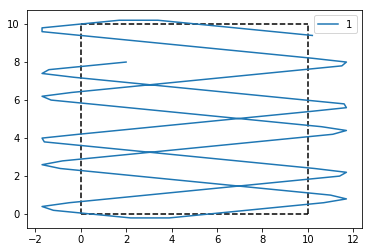

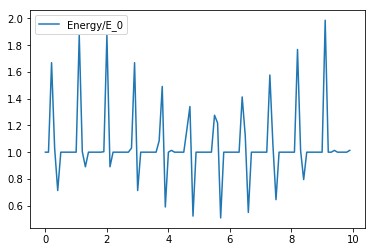

In [29]:
T = 10
partNum=1     # number of particles
dt=0.1       # time step 
iterations = int(T/dt)-1

X,Y,E = Verlet(partNum,iterations)

plot_box(LX,LY)
for i in range(partNum):
    plt.plot(X[:,i],Y[:,i],label=str(i+1))
plt.legend()
plt.show()

plt.plot(np.linspace(0,iterations*dt,iterations+1),E/E[0],label="Energy/E_0")
plt.legend()
plt.show()